# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries

import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [26]:
# import data set from Ironhack's database
df=pd.read_csv('Employee.csv')
df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [4]:
# Method 1

df.groupby(by='Department')['Salary'].mean()



Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [16]:
# Method 2

df[['Department','Salary']].pivot_table(index='Department', values='Salary', aggfunc=[np.mean])

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [18]:
df[['Department', 'Title', 'Salary']].pivot_table(index=['Department','Title'], values='Salary', aggfunc=[np.mean])

mean
                     Salary
Department Title           
HR         VP          70.0
           analyst     32.5
IT         VP          70.0
           analyst     32.5
           associate   60.0
Sales      associate   55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [20]:
df[['Years', 'Title', 'Salary']].pivot_table(index=['Title','Years'], values='Salary', aggfunc=[np.mean])

mean
                Salary
Title     Years       
VP        8         70
analyst   1         35
          2         30
          4         35
associate 2         55
          3         55
          7         60

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [22]:
df[['Department', 'Title', 'Salary']].pivot_table(index=['Department','Title'], values='Salary', aggfunc=[len,np.mean])

len   mean
                     Salary Salary
Department Title                  
HR         VP             1   70.0
           analyst        2   32.5
IT         VP             1   70.0
           analyst        2   32.5
           associate      1   60.0
Sales      associate      2   55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [25]:
df[['Department', 'Title', 'Salary']].pivot_table(index=['Department','Title'], values='Salary', aggfunc=[np.median, min, max,np.std])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:
"""
Based on the pivot table we just created, we can see that the hightest salary is for the VP job title.
We have null values in the standard deviation column where there is no point of comparison for one title (e.g. there is only one IT associate, so the std is null, whereas for the Sales associates, the std is equal to 0 cause there are 2 associates but there is no difference between their salaries that are equal to 55 and 55).

"""

#### Based on your comments, fill the missing values with an appropriate value.

In [27]:
"""
We know that when there is no difference in the values compared, there is no deviance from the mean, and then the std is equal to 0. Then we can replace the null values in the std salary column by 0.

"""

df[['Department', 'Title', 'Salary']].pivot_table(index=['Department','Title'], values='Salary', aggfunc=[np.median, min, max,np.std]).fillna(0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [29]:
df[['Department', 'Salary']].pivot_table(index='Department', values='Salary', aggfunc=[len,sum])

,len,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [34]:
df[['Department', 'Title', 'Years']].pivot_table(index=['Department', 'Title'], values='Years', aggfunc=sum)

Years
Department Title           
HR         VP             8
           analyst        6
IT         VP             8
           analyst        3
           associate      7
Sales      associate      5

In [35]:
df[['Department', 'Title', 'Salary']].pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# will do if I can catch-up on my other labs :)

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [40]:
# import data set from Ironhack's database
fitbit=pd.read_csv('fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [41]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [50]:
correlation = fitbit[["Minutes Very Active", "Steps"]]
correlation.corr(method='pearson')


,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [45]:
import matplotlib.pyplot as plt;

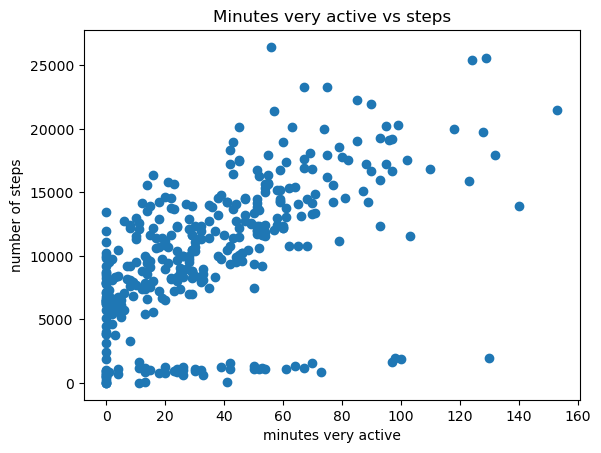

In [53]:

plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Minutes very active vs steps")
plt.xlabel("minutes very active")
plt.ylabel("number of steps")
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
It looks like there is a positive correlation between the minutes very active and the steps, however, it looks like the correlation is weak since there are points (outliers) that are far from the others on the bottom of the chart.
The correlation is strong between 5000-17500 steps and between 0 and 70 minutes.
 
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [54]:
new_correlation = fitbit[["Minutes Sedentary", "Steps"]]
new_correlation.corr(method='pearson')

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

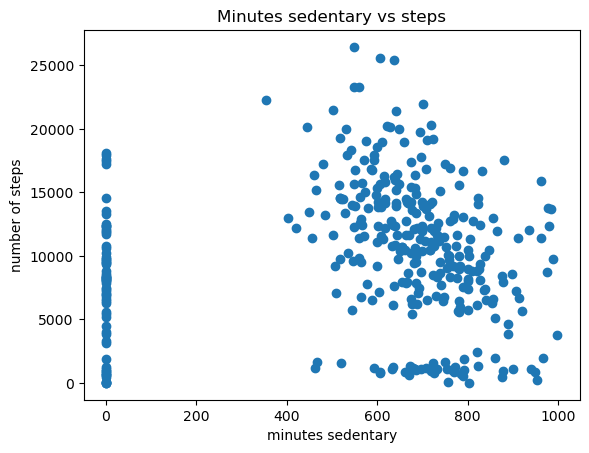

In [55]:

plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Minutes sedentary vs steps")
plt.xlabel("minutes sedentary")
plt.ylabel("number of steps")
plt.show()


In [ ]:
"""
It looks like the correlation between the minutes sedentary and the number of steps is very weak, we can understand it thanks to the correlation computation and thanks to the graph that doesn't show any data linearity.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [56]:
new_correlation = fitbit[["MinutesOfSleep", "Steps"]]
new_correlation.corr(method='pearson')

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

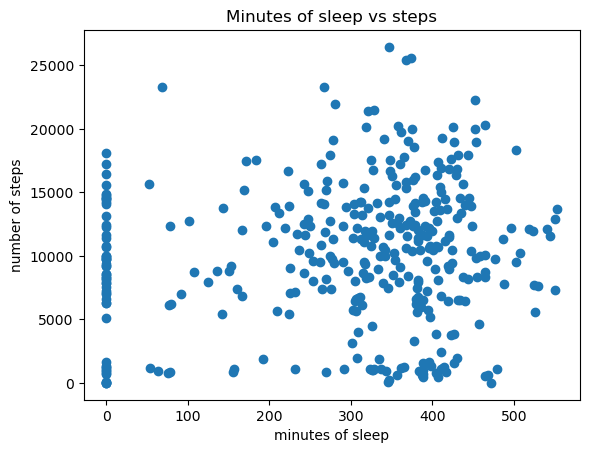

In [57]:

plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title("Minutes of sleep vs steps")
plt.xlabel("minutes of sleep")
plt.ylabel("number of steps")
plt.show()


In [ ]:
"""
It looks like the correlation between minutes of sleep vs steps is weak. The points look really scattered on the graph and the correlation computation is weak (0.13)
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [61]:
subset = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
subset

cor_fit = subset.corr(method='pearson')
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [63]:
cor_fit.sort_values('Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [64]:
# import data set from Ironhack's database
time_grades=pd.read_csv('Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

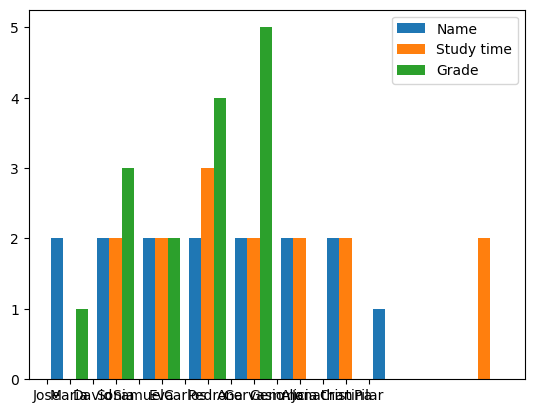

In [73]:
plt.hist(time_grades);
plt.legend(time_grades)


#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [68]:
new_correlation = time_grades[["Study time", "Grade"]]
new_correlation.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [69]:
new_correlation = time_grades[["Study time", "Grade"]]
new_correlation.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
It looks like there is a strong positive correlation between Study time and Grade, even more with the Spearman method than the Pearson one (0.82 > 0.80).
Then, we should choose the Spearman method rather than the Pearson one since it might be monotonic, as well as it might be a linear relationship, there is no risk choosing the Spearman method.
No harm would be done by switching to Spearman even if the data turned out to be perfectly linear. But, if it’s not exactly linear and we use Pearson's coefficient then we’ll miss out on the information that Spearman could capture.

"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

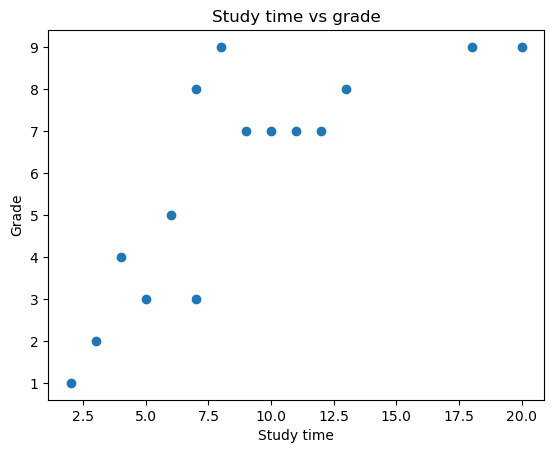

In [71]:

plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.title("Study time vs grade")
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()


In [ ]:
"""
Since the pearson coefficient is 0.80 and the spearman coefficient 0.802, it looks like it tends to a monotonically increasing relationship.
Spearman is not exactly 1 but the coefficient is close. The correlation between the study time and the grade increases, so it means that the more you study, the more chance you have to get a good grade!
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
A monotonic relationship is a relationship that does one of the following:
(1) as the value of one variable increases, so does the value of the other variable, OR,
(2) as the value of one variable increases, the other variable value decreases.
BUT, not exactly at a constant rate whereas in a linear relationship the rate of increase/decrease is constant.
"""